# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
male_players_df = pd.read_csv('../data/male_players.csv', usecols=['player_id', 'fifa_version', 'fifa_update','short_name', 'overall', 'age', 'club_name', 'player_face_url', 'value_eur'])

In [3]:
male_players_df.sort_values(by=['fifa_version','fifa_update'], ascending=False, inplace=True)
male_players_df.drop_duplicates(subset=['player_id', 'fifa_version'], inplace=True,keep='first')


print(male_players_df.shape)

(196933, 9)


In [4]:
male_players_df[male_players_df['player_id']==158023]

,player_id,fifa_version,fifa_update,short_name,overall,value_eur,age,club_name,player_face_url
0,158023,23,9,L. Messi,91,54000000.0,35,Paris Saint Germain,https://cdn.sofifa.net/players/158/023/23_120.png
166674,158023,22,64,L. Messi,92,69500000.0,34,Paris Saint Germain,https://cdn.sofifa.net/players/158/023/22_120.png
1385125,158023,21,64,L. Messi,93,103500000.0,33,Paris Saint Germain,https://cdn.sofifa.net/players/158/023/21_120.png
2582753,158023,20,61,L. Messi,94,95500000.0,32,FC Barcelona,https://cdn.sofifa.net/players/158/023/20_120.png
3711090,158023,19,68,L. Messi,94,110500000.0,31,FC Barcelona,https://cdn.sofifa.net/players/158/023/19_120.png
4941076,158023,18,84,L. Messi,94,118500000.0,30,FC Barcelona,https://cdn.sofifa.net/players/158/023/18_120.png
6453436,158023,17,91,L. Messi,93,89000000.0,29,FC Barcelona,https://cdn.sofifa.net/players/158/023/17_120.png
8054866,158023,16,58,L. Messi,94,101000000.0,28,FC Barcelona,https://cdn.sofifa.net/players/158/023/16_120.png
9041041,158023,15,59,L. Messi,93,100500000.0,27,FC Barcelona,https://cdn.sofifa.net/players/158/023/15_120.png


First, we would like to present a brief statistical visualization of the overall scores of players in each FIFA version and compare the distribution with normal distribution data of the same mean and volatility. The figure is shown below.

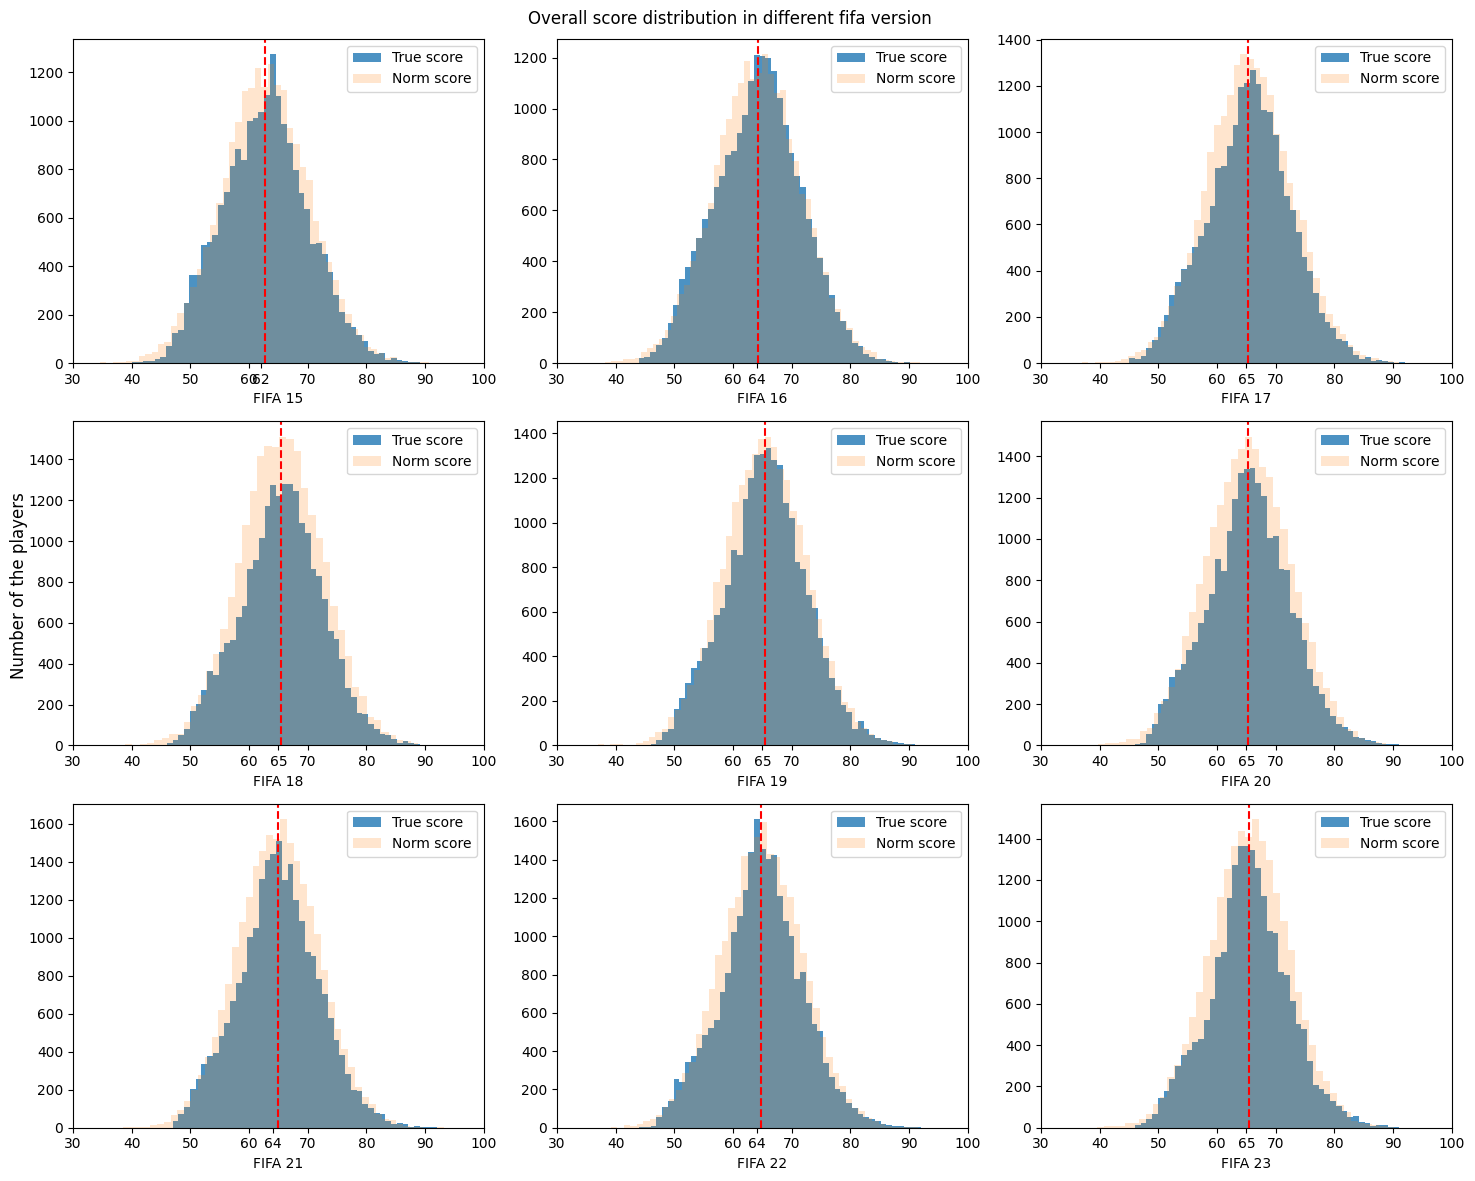

In [5]:
import matplotlib.pyplot as plt 
from random import random
male_players_df_23 = male_players_df[male_players_df['fifa_version']==23]
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(12)
fig.set_figwidth(15)
# Plot the overall score distribution and compare it with the actual normal-distributed data
for index, ax in enumerate(axes.flat):
    male_players_df_sub = male_players_df[male_players_df['fifa_version']==index + 15]
    mean_score = np.average(male_players_df_sub['overall'])
    var = np.var(male_players_df_sub['overall'])
    norm_value = np.random.normal(loc=mean_score, scale=np.sqrt(var),size=male_players_df_sub.shape[0])
    ax.hist(male_players_df_sub['overall'], bins = max(male_players_df_sub['overall'])-min(male_players_df_sub['overall'])+1,alpha = 0.8, label='True score')
    ax.hist(norm_value, bins= max(male_players_df_sub['overall'])-min(male_players_df_sub['overall'])+1, alpha = 0.2,label = 'Norm score')
    ax.axvline(mean_score, color='r', linestyle='--')
    ax.legend()
    ax.set_xticks(list(ax.get_xticks())+[int(mean_score)])
    ax.set_xlabel(f'FIFA {index+15}')

fig.supylabel("Number of the players")
fig.suptitle("Overall score distribution in different fifa version")
fig.tight_layout()

It is evident that in almost all FIFA versions, the distribution of players' overall scores resembles a normal distribution. This statistical characteristic allows us to differentiate between players of varying levels.

For this purpose, we define thresholds to categorize a player's skill level based on his overall score into six categories: "world-top player", "top player", "great player", "above-average player", "below-average player", and "bad player". These thresholds are based on the assumption of a normal distribution for the overall scores.

Let's consider Kylian Mbappé and Luis Suárez as examples to provide insight into the career trajectories of top football players at different stages of their careers.

In [6]:
import scipy.stats as stats
def player_classifier(overall_score,mean, std):
    tvalue = stats.norm.cdf(overall_score, loc = mean, scale = std)
    threadshold_lt = {0.999:"world-top player", 0.99:"top player", 0.9:"great player", 
                      0.5:"above-average player", 0.1:"below-average player", 0:"bad player"}
    threadshold_key = sorted(threadshold_lt.keys())
    left = 0 
    right = len(threadshold_key) -1
    result = None
    # binary search
    while left <= right:
        mid = (left+right)//2
        if threadshold_key[mid] <= tvalue:
            result = threadshold_key[mid]
            left = mid + 1
        else:
            right = mid - 1
    
    return threadshold_lt[result]

stats_dict = male_players_df.groupby(['fifa_version'])['overall'].agg(['mean','std']).to_dict('index')

def map_player_classifier(row):
    mean = stats_dict[row['fifa_version']]['mean']
    std = stats_dict[row['fifa_version']]['std']
    return player_classifier(row['overall'], mean, std)

male_players_df['player_class'] = male_players_df.apply(map_player_classifier,axis=1)

In [7]:
male_players_df[male_players_df['player_id']==231747][['player_id','fifa_version','short_name','overall','age','club_name','player_class']]

,player_id,fifa_version,short_name,overall,age,club_name,player_class
4,231747,23,K. Mbappé,91,23,Paris Saint Germain,world-top player
166680,231747,22,K. Mbappé,91,22,Paris Saint Germain,world-top player
1385135,231747,21,K. Mbappé,90,21,Paris Saint Germain,world-top player
2582774,231747,20,K. Mbappé,89,20,Paris Saint Germain,world-top player
3711126,231747,19,K. Mbappé,88,19,Paris Saint Germain,world-top player
4941222,231747,18,K. Mbappé,84,18,Paris Saint Germain,top player
6454131,231747,17,K. Mbappé,79,17,Monaco,great player
8064235,231747,16,K. Mbappe Lottin,65,16,Monaco,above-average player


In [8]:
male_players_df[male_players_df['player_id']==176580][['player_id','fifa_version','short_name','overall','age','club_name','player_class']]

,player_id,fifa_version,short_name,overall,age,club_name,player_class
18219,176580,23,L. Suárez,84,35,Nacional,top player
166718,176580,22,L. Suárez,86,34,Atlético Madrid,top player
1385154,176580,21,L. Suárez,87,33,Atlético Madrid,world-top player
2582768,176580,20,L. Suárez,89,32,FC Barcelona,world-top player
3711092,176580,19,L. Suárez,91,31,FC Barcelona,world-top player
4941078,176580,18,L. Suárez,92,30,FC Barcelona,world-top player
6453438,176580,17,L. Suárez,92,29,FC Barcelona,world-top player
8054869,176580,16,L. Suárez,90,28,FC Barcelona,world-top player
9041047,176580,15,L. Suárez,89,27,FC Barcelona,world-top player


Observing Kylian Mbappé's development, we see that with the improvement in his skill level, he transferred from Monaco to Paris Saint-Germain, one of the world's premier football teams. At Paris Saint-Germain, he achieved significant improvement in his overall score.

We also examine another contrasting example, Luis Suárez. Classified as a world-top player during his time at FC Barcelona, his football skills have gradually declined with age, especially after his transfer to Atlético Madrid, and even more so when he chose to play for Nacional in the Uruguayan football league. These two examples showcase the career trajectories of a young rising star and a former top striker, illustrating how they navigate their careers by moving among top football teams. From this, we aim to generally understand how players plan their careers through transitions between leading football clubs.

Following this, we investigate the most improved players in our dataset over this nine-year period.

In [10]:
class_rank_df = male_players_df.groupby(['player_id'],as_index=False)['player_class'].agg(lambda x: np.unique(x).size).sort_values(by=['player_class','player_id'],ascending=False)
class_rank_df = class_rank_df[class_rank_df['player_class']>1]
print(f"The numbers of players who have class change in the 8 years are {class_rank_df.shape[0]}")

The numbers of players who have class change in the 8 years are 18569


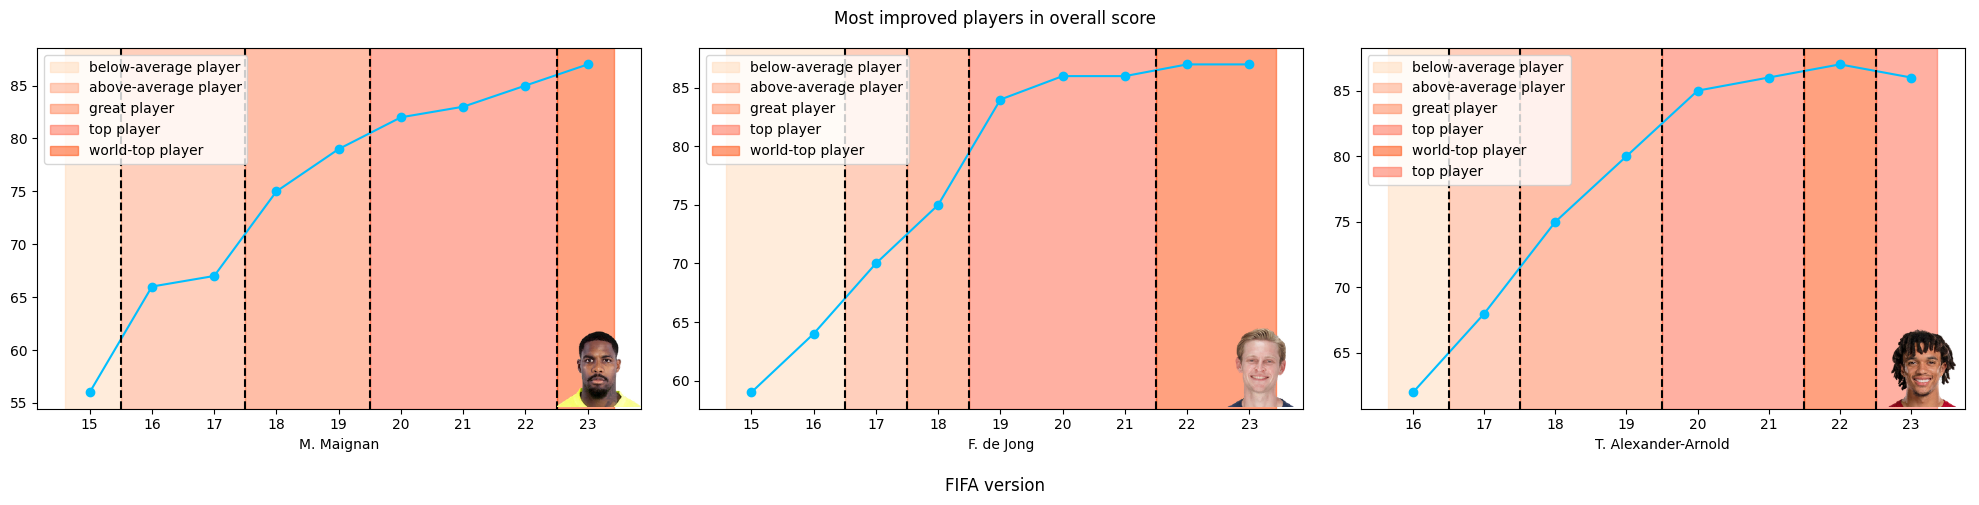

In [11]:
import urllib
from PIL import Image
import matplotlib
max_change = max(class_rank_df['player_class'])
top_improve_player = np.unique(class_rank_df[class_rank_df['player_class']==max_change]['player_id'])
fig2, axes = plt.subplots(nrows=1, ncols=top_improve_player.size)
fig2.set_figheight(5)
fig2.set_figwidth(20)
axvspan_color = {"world-top player":'orangered', "top player":'tomato', "great player":'coral', 
                      "above-average player":'lightsalmon', "below-average player":'peachpuff',"bad player":'linen'}
for index, ax in enumerate(axes.flat):
    # plot the overall score
    id = top_improve_player[index]
    sub_df = male_players_df[male_players_df['player_id']==id]
    ax.plot(sub_df['fifa_version'],sub_df['overall'],'o-',color = 'deepskyblue')
    ax.set_xlabel(np.unique(sub_df['short_name'])[0])
    
    # plot the change of the players' class 
    player_class = None
    xleft, xright = None,None

    for row in sub_df.sort_values(by=['fifa_version']).iterrows():
        next_player_class = row[1]['player_class']
        if (player_class == next_player_class)|(player_class == None):
            pass
        else:
            xleft = xright if xright!=None else ax.get_xlim()[0]
            xright = row[1]['fifa_version'] - 0.5
            ax.axvspan(xleft, xright, alpha = 0.5, color = axvspan_color[player_class], label = player_class)
            ax.axvline(row[1]['fifa_version'] - 0.5,color='black',linestyle = '--')
        player_class = next_player_class
    ax.axvspan(xright, ax.get_xlim()[-1], alpha = 0.5, color = axvspan_color[player_class], label = player_class)

    # Add the players' face in the right bottom corner
    face_image = np.unique(sub_df['player_face_url'])[-1]
    req = urllib.request.Request(face_image, headers={'User-Agent': 'Mozilla/5.0'})
    image = Image.open(urllib.request.urlopen(req))
    img_np = np.array(image)
    # Adding the image in the right bottom corner
    imagebox = matplotlib.offsetbox.OffsetImage(img_np, zoom=0.5)
    ab = matplotlib.offsetbox.AnnotationBbox(imagebox, (0.93, 0.12), frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)

    ax.legend(loc='upper left')
    ax.set_xticks(np.arange(min(sub_df['fifa_version']), max(sub_df['fifa_version']) + 1,1))

fig2.supxlabel('FIFA version')
fig2.suptitle("Most improved players in overall score")
fig2.tight_layout()

We observe that only three players have made the most significant leaps in their nine-year football careers, marking the most impressive improvements in the transfer market. These players are M. Maignan, F. de Jong, and T. Alexander-Arnold. Over these nine years, these three individuals rose from below-average players to world-top players. Along with other players who have experienced changes in their skill level, we will attempt to visualize the dynamic interaction between a football player's performance level and the team they play for throughout their career.